C:\Users\manda\AppData\Local\Temp\ipykernel_20524\3924267873.py:55: RuntimeWarning: invalid value encountered in power
  im4[:, :, channel] = t[:,:] ** transmission_ratio


(-0.5, 499.5, 334.5, -0.5)

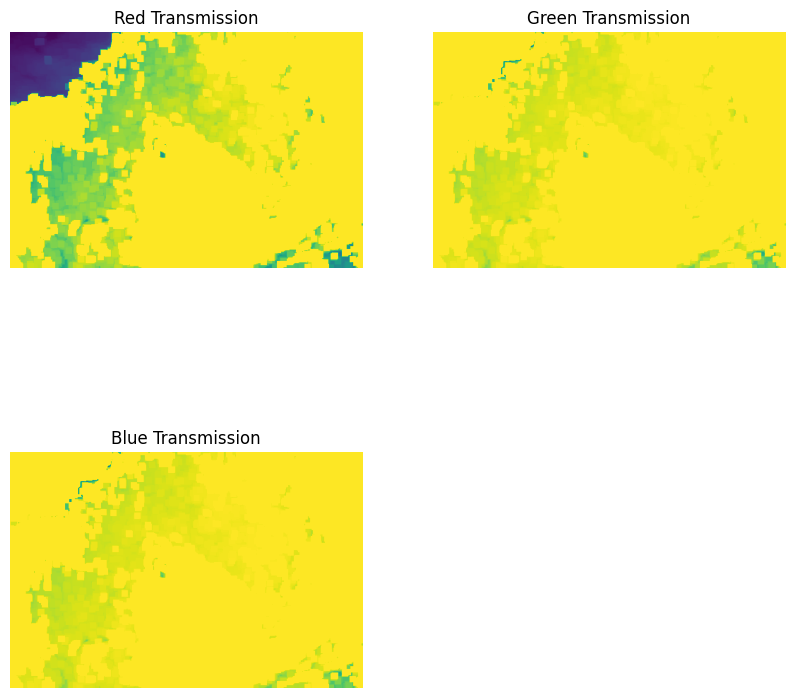

In [4]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt


def BL(image):
    b, g, r = cv2.split(image)
    [h, w] = image.shape[:2]
    imsz = h * w
    numpx = int(max(math.floor(imsz / 1000), 1))
    kernel = np.ones((9, 9), np.uint8)
    r_with_local_patch = cv2.dilate(r, kernel)
    g_with_local_patch = cv2.dilate(g, kernel)
    b_with_local_patch = cv2.dilate(b, kernel)

    diff_vector = np.sqrt(np.square(r_with_local_patch - g_with_local_patch) + np.square(r_with_local_patch - b_with_local_patch))

    vec=diff_vector.reshape(imsz)
    imvec = image.reshape(imsz, 3)

    indices = vec.argsort()
    indices = indices[imsz - numpx::]

    atmsum = np.zeros([1, 3])
    for ind in range(1, numpx):
        atmsum = atmsum + imvec[indices[ind]]

    A = atmsum / numpx
    return A

def Transmission_of_red(image,BL):
    im3 = np.empty(image.shape, image.dtype)

    for ind in range(0, 3):
        im3[:, :, ind] = image[:, :, ind] / BL[0, ind]

    b, g, r = cv2.split(im3)
    dc = cv2.min(cv2.min(r, g), b)
    kernel = np.ones((9, 9), np.uint8)
    transmission_red=1-cv2.erode(dc,kernel)

    return transmission_red


def Transmission(image, BL, t):
    im4 = np.empty(image.shape, image.dtype)
    scaled_BL = [BL[0, 0] * 1000, BL[0, 1] * 1000, BL[0, 2] * 1000]
    m = -0.00113
    i = 1.62517
    lamda = [620, 540, 450]

    for channel in range(3):
        transmission_ratio = scaled_BL[0] * (m * lamda[channel] + i) / (scaled_BL[channel] * (m * lamda[0] + i))
        im4[:, :, channel] = t[:,:] ** transmission_ratio
    
    return im4



fn = 'C:/College Projects/Applied LA for ML/5426a351-39e9-478c-8775-5fbcd69d30e5/raw/raw-890/927_img_.png'

src = cv2.imread(fn)
image=cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
I=image.astype('float64') / 255
BL_estimate=BL(I)
red_transmission_map=Transmission_of_red(I,BL_estimate)
Transmission_map=Transmission(I,BL_estimate,red_transmission_map)

t_r,t_g,t_b=cv2.split(Transmission_map)

t_r = np.nan_to_num(t_r, nan=1)
t_g = np.nan_to_num(t_g, nan=1)
t_b = np.nan_to_num(t_b, nan=1)

plt.figure(figsize=(10, 10))


plt.subplot(2, 2, 1)
plt.imshow(t_r)
plt.title('Red Transmission')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(t_g)
plt.title('Green Transmission')
plt.axis('off')


plt.subplot(2, 2, 3)
plt.imshow(t_b)
plt.title('Blue Transmission')
plt.axis('off')





